In [1]:
!wget --no-check https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

--2022-02-28 22:09:29--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 99.86.105.225, 99.86.105.201, 99.86.105.62, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|99.86.105.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa.1’

lambda_virus.fa.1   100%[===================>]  48.12K  --.-KB/s    in 0.01s   

2022-02-28 22:09:30 (3.21 MB/s) - ‘lambda_virus.fa.1’ saved [49270/49270]



In [2]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

In [3]:
genome = readGenome('lambda_virus.fa')

In [4]:
print(genome[:100])
len(genome)

GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACC


48502

In [5]:
counts = {'A': 0, 'C': 0, 'G': 0, 'T': 0 }
for base in genome:
    counts[base] += 1
print(counts)

{'A': 12334, 'C': 11362, 'G': 12820, 'T': 11986}


In [6]:
import collections
collections.Counter(genome)

Counter({'G': 12820, 'C': 11362, 'A': 12334, 'T': 11986})

In [7]:
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

def read_FAST_A(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

genome = read_FAST_A('lambda_virus.fa')
print(genome)

GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACCCTCTGAAAAGAAAGGAAACGACAGGTGCTGAAAGCGAGGCTTTTTGGCCTCTGTCGTTTCCTTTCTCTGTTTTTGTCCGTGGAATGAACAATGGAAGTCAACAAAAAGCAGCTGGCTGACATTTTCGGTGCGAGTATCCGTACCATTCAGAACTGGCAGGAACAGGGAATGCCCGTTCTGCGAGGCGGTGGCAAGGGTAATGAGGTGCTTTATGACTCTGCCGCCGTCATAAAATGGTATGCCGAAAGGGATGCTGAAATTGAGAACGAAAAGCTGCGCCGGGAGGTTGAAGAACTGCGGCAGGCCAGCGAGGCAGATCTCCAGCCAGGAACTATTGAGTACGAACGCCATCGACTTACGCGTGCGCAGGCCGACGCACAGGAACTGAAGAATGCCAGAGACTCCGCTGAAGTGGTGGAAACCGCATTCTGTACTTTCGTGCTGTCGCGGATCGCAGGTGAAATTGCCAGTATTCTCGACGGGCTCCCCCTGTCGGTGCAGCGGCGTTTTCCGGAACTGGAAAACCGACATGTTGATTTCCTGAAACGGGATATCATCAAAGCCATGAACAAAGCAGCCGCGCTGGATGAACTGATACCGGGGTTGCTGAGTGAATATATCGAACAGTCAGGTTAACAGGCTGCGGCATTTTGTCCGCGCCGGGCTTCGCTCACTGTTCAGGCCGGAGCCACAGACCGCCGTTGAATGGGCGGATGCTAATTACTATCTCCCGAAAGAATCCGCATACCAGGAAGGGCGCTGGGAAACACTGCCCTTTCAGCGGGCCATCATGAATGCGATGGGCAGCGACTACATCCGTGAGGTGAATGTGGTGAAGTCTGCCCGTGTCGGTTATTCCAAAATGCTGCTGGGTGTTTATGCCTACTTTATAGAGCATAA

In [8]:
# Question 1: How many times does AGGT or its reverse complement (ACCT) occur in the lambda virus genome?
# E.g. if AGGT occurs 10 times and ACCT occurs 12 times, you should report 22.
count = 0
count += len(naive('AGGT', genome))
count += len(naive(reverseComplement('AGGT'), genome))
print(count)

306


In [9]:
# Question 2: How many times does TTAA or its reverse complement occur in the labda virus genome?
# Hint: TTAA and its reverse complement are equal, so remember to not double count.
count = len(naive('TTAA', genome))
print(count)

195


In [11]:
# Qusetion 3: What is the offset of the leftmost occurrence of ACTAAGT or its reverse complement
# in the Lambda virus genome? E.g. if the leftmost occurrence of ACTAAGT is at offset 40 (0-based)
# and the leftmost occurrence of its reverse complement ACTTAGT is at offset 29, then report 29.
s = 'abcdefghijklmnopqrstuvwxyz'
print(s)
for i in range(len(s)):
    print(i % 10, end='')

s.rfind('tuv')

abcdefghijklmnopqrstuvwxyz
01234567890123456789012345

19

In [12]:
needle = 'ACTAAGT'
offset1 = genome.rfind(needle)
offset2 = genome.rfind(reverseComplement(needle))
print('offset1: %d    offset2: %d' % (offset1, offset2))
print(min(offset1, offset2))

offset1: 45382    offset2: 26028
26028


In [13]:
# Question 4: What is the offset of the leftmost occurrence of AGTCGA or its reverse complement
# in the Lambda virus genome?
needle = 'AGTCGA'
offset1 = genome.find(needle)
offset2 = genome.find(reverseComplement(needle))
print('offset1: %d    offset2: %d' % (offset1, offset2))
print(min(offset1, offset2))

offset1: 18005    offset2: 450
450


In [14]:
# Question 5: We want to find occurrences with one or more differences.
# How many times does TTCAAGCC occur in the Lambda virus genome when allowing up to 2 mismatches?

def naive_2mm(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        mismatch = 0
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                mismatch += 1
                if mismatch > 2:
                    break
        if mismatch <= 2:
            occurrences.append(i)  # all chars matched; record
    return occurrences
naive_2mm('ACTTTA', 'ACTTACTTGATAAAGT')

[0, 4]

In [15]:
count = len(naive_2mm('TTCAAGCC', genome))
print(count)

191


In [16]:
# Question 6: What is the offset of the leftmost occurrence of AGGAGGTT
# in the Lambda virus genome when allowing up to 2 mismatches?
offsets = naive_2mm('AGGAGGTT', genome)
print(offsets[0])

49


In [17]:
# Question 7: Report which sequencing cycle has the problem. Remember that a sequencing cycle corresponds
# to a particular offset in all the reads. For example, if the leftmost read position seems
# to have a problem consistently across reads, report 0. If the fourth position from the left has the problem,
# report 3. Do whatever analysis you think is needed to identify the bad cycle.
# It might help to review the "Analyzing reads by position" video.

!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

--2022-02-28 22:14:32--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 99.86.105.174, 99.86.105.201, 99.86.105.225, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|99.86.105.174|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241626 (236K) [application/octet-stream]
Saving to: ‘ERR037900_1.first1000.fastq’

ERR037900_1.first10 100%[===================>] 235.96K  --.-KB/s    in 0.05s   

2022-02-28 22:14:32 (4.74 MB/s) - ‘ERR037900_1.first1000.fastq’ saved [241626/241626]



In [18]:
def read_FAST_Q(filename):
    sequences = []
    qualities = []
    with open(filename, 'r') as f:
        while True:
            f.readline()
            seq = f.readline().rstrip()
            f.readline()
            qual = f.readline().rstrip()
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

In [19]:
seq, qual = read_FAST_Q('ERR037900_1.first1000.fastq')
print(seq[:5])
print(qual[:5])
print(len(seq[0]))

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTNACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTACC', 'AACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTNACCCTAACCCTAACCCTAACCCTAAACCTAACC']
['HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGFHHHFHFFHHHHHGHHFHEH@4#55554455HGFBF<@C>7EEF@FBEDDD<=C<E', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCHHHHEHHBA#C>@54455C/7=CGHEGEB;C############', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGHHHHHHHHHHHHHDHHHDEHHHHFGIHEHEGGGF4#45655366GIGEHAGBG################', 'HHHHHHHHHHHHHHHHHHHHHHHHHIHHHHHHHHHHHHHHHHHHHHHHIHHHHHIHFHHHIHHHHD#ECA54655GGIBH?BD@+BCBF?5A=::>8?##', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHIHIHEHHIGHIFFH

In [20]:
def QtoPhred33(Q):
    '''Turn Q into Phred+33 ASCII-­‐encoded quality'''
    return chr(Q + 33) # converts character to integer according to ASCII table

def phred33ToQ(qual):
    '''Turn Phred+33 ASCII-encoded quality into Q'''
    return ord(qual) - 33 # converts integer to character according to ASCII table

def createHistory(qualities):
    history = [0] * 50
    for qual in qualities:
        for phred in qual:
            q = phred33ToQ(phred)
            history[q] += 1
    return history
h = createHistory(qual)
print(h)

[0, 0, 17723, 0, 2, 11, 11, 28, 23, 55, 100, 111, 86, 174, 185, 272, 317, 259, 390, 1523, 2782, 762, 286, 413, 403, 538, 351, 694, 971, 777, 1024, 1449, 1341, 1312, 1916, 2233, 3025, 4043, 6640, 45696, 2074, 0, 0, 0, 0, 0, 0, 0, 0, 0]


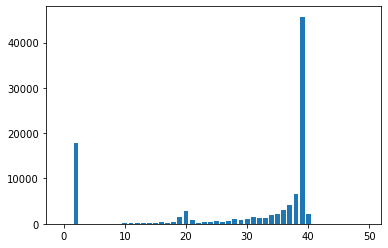

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(len(h)), h)
plt.show()

In [22]:
import collections

def maxPoorQualitySequencingCycle(qualities):
    min_score = 123456789
    min_index = -1
    for i, qual in enumerate(qualities):
        score = sum(map(ord, qual))
        if min_score > score:
            min_score = score
            min_index = i
    return min_index

In [23]:
offset = maxPoorQualitySequencingCycle(qual)
print("incorrect answer: %d" % offset)

incorrect answer: 111


In [24]:
print("well this was my best guess...\n" + qual[111])

well this was my best guess...
A@A@A9@?>A45555@@46?54/5/554+588<<8FCBF#############################################################
